In [1]:
%load_ext autoreload
%autoreload 2
from RTKToArrayConversion import *
from ExtendedConeBeamDCC import *
from ConeBeamDCCWithBackprojectionPlane import *
import time

In [2]:
filesdir_ref = "/home/mmouchet/Documents/SIEMENSDATA/GO.SIM/4D_patients/VJL/donneesBrutes/sans_comp/n20_n50/"
# reading projections
proj = itk.imread(filesdir_ref+"corrected_proj_diaphragm.mha")
# Reading the geometry of the scanner
xmlreader = rtk.ThreeDCircularProjectionGeometryXMLFileReader.New()
xmlreader.SetFilename(filesdir_ref+'geometry_diaphragm.xml')
# xmlreader.SetFilename(filesdir_ref+"geometry.xml")
xmlreader.GenerateOutputInformation()
geometry = xmlreader.GetOutputObject()
print('nproj = %d'%(len(geometry.GetGantryAngles())))
print(proj.GetLargestPossibleRegion().GetSize())

nproj = 26681
itkSize3 ([920, 32, 26681])


0.9962685108184814


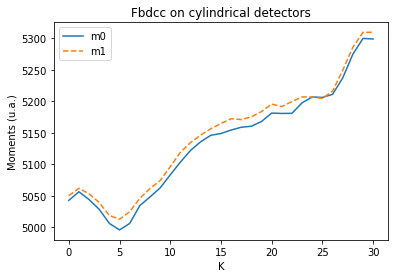

In [3]:
# Select the pair
idx0, idx1 = 13340, 13340 -10
# Compute moments with backprojection plane

start = time.time()
pair_bp = ProjectionsPairBP(idx0, idx1, geometry, proj)
pair_bp.LinesMomentsCorners()
print(time.time()-start)
pair_bp.PlotPairMoments()



[array([1.02806101, 1.0947541 , 1.        ]), array([0., 0., 0.]), array([  920,    32, 26681]), array([[ 1.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0.,  1.]])]
0.003992557525634766


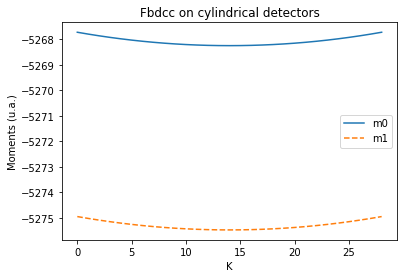

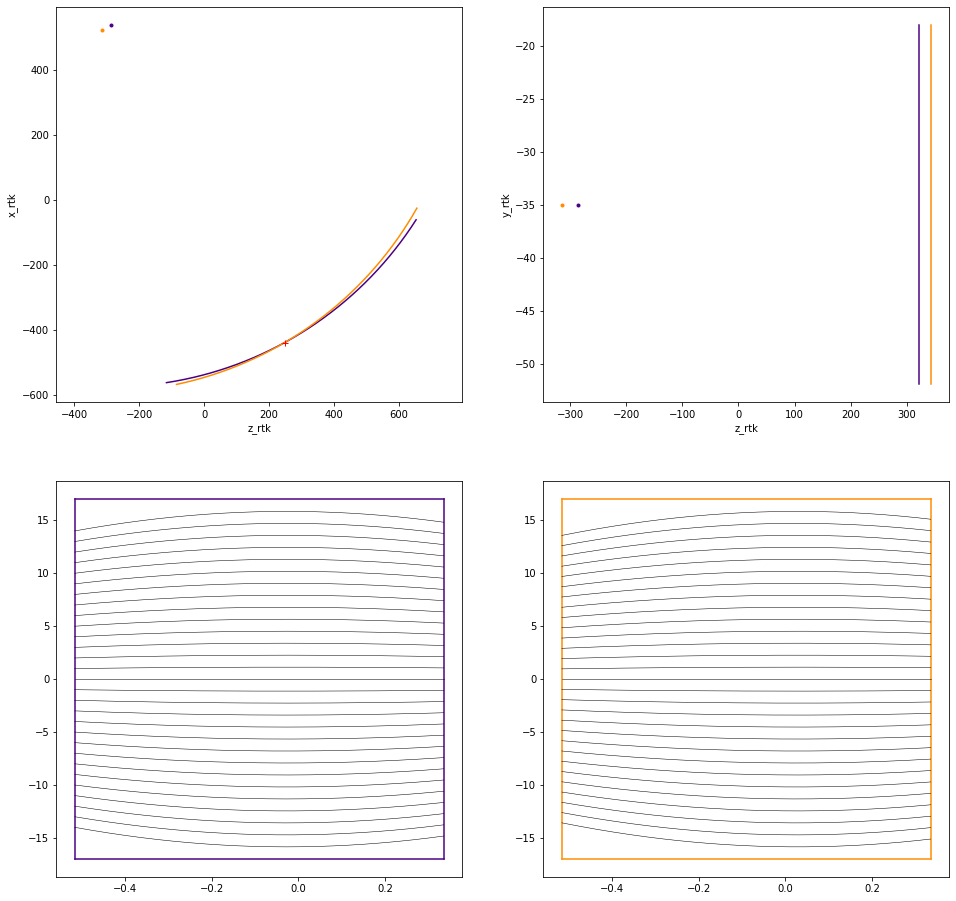

In [10]:
#Convert to array for faster computation directly on the physical detector
geometry_array = RTKtoNP(geometry)
proj_array = itk.GetArrayFromImage(proj)
proj_infos = GetProjectionInformations(proj)
source_pos_array = GetSourcePositions(geometry)
rotation_matrices_array = GetRotationMatrices(geometry)
fixed_matrices_array = GetFixedSystemMatrices(geometry)
print(proj_infos)

start = time.time()
pair = ProjectionsPair(idx0, idx1 , geometry_array, source_pos_array, rotation_matrices_array, fixed_matrices_array, proj_array, proj_infos)
print(time.time()-start)
pair.ComputePairMoments()
pair.PlotPairMoments()
pair.PlotPairGeometry()